In [4]:
import torch
from torchvision.io import read_image, ImageReadMode
from torchvision.transforms.functional import resize
from matplotlib import pyplot as plt

idx_to_cls = {0: 'Chihuahua',
 1: 'Japanese_spaniel',
 2: 'Maltese_dog',
 3: 'Pekinese',
 4: 'Shih',
 5: 'Blenheim_spaniel',
 6: 'papillon',
 7: 'toy_terrier',
 8: 'Rhodesian_ridgeback',
 9: 'Afghan_hound',
 10: 'basset',
 11: 'beagle',
 12: 'bloodhound',
 13: 'bluetick',
 14: 'black',
 15: 'Walker_hound',
 16: 'English_foxhound',
 17: 'redbone',
 18: 'borzoi',
 19: 'Irish_wolfhound',
 20: 'Italian_greyhound',
 21: 'whippet',
 22: 'Ibizan_hound',
 23: 'Norwegian_elkhound',
 24: 'otterhound',
 25: 'Saluki',
 26: 'Scottish_deerhound',
 27: 'Weimaraner',
 28: 'Staffordshire_bullterrier',
 29: 'American_Staffordshire_terrier',
 30: 'Bedlington_terrier',
 31: 'Border_terrier',
 32: 'Kerry_blue_terrier',
 33: 'Irish_terrier',
 34: 'Norfolk_terrier',
 35: 'Norwich_terrier',
 36: 'Yorkshire_terrier',
 37: 'wire',
 38: 'Lakeland_terrier',
 39: 'Sealyham_terrier',
 40: 'Airedale',
 41: 'cairn',
 42: 'Australian_terrier',
 43: 'Dandie_Dinmont',
 44: 'Boston_bull',
 45: 'miniature_schnauzer',
 46: 'giant_schnauzer',
 47: 'standard_schnauzer',
 48: 'Scotch_terrier',
 49: 'Tibetan_terrier',
 50: 'silky_terrier',
 51: 'soft',
 52: 'West_Highland_white_terrier',
 53: 'Lhasa',
 54: 'flat',
 55: 'curly',
 56: 'golden_retriever',
 57: 'Labrador_retriever',
 58: 'Chesapeake_Bay_retriever',
 59: 'German_short',
 60: 'vizsla',
 61: 'English_setter',
 62: 'Irish_setter',
 63: 'Gordon_setter',
 64: 'Brittany_spaniel',
 65: 'clumber',
 66: 'English_springer',
 67: 'Welsh_springer_spaniel',
 68: 'cocker_spaniel',
 69: 'Sussex_spaniel',
 70: 'Irish_water_spaniel',
 71: 'kuvasz',
 72: 'schipperke',
 73: 'groenendael',
 74: 'malinois',
 75: 'briard',
 76: 'kelpie',
 77: 'komondor',
 78: 'Old_English_sheepdog',
 79: 'Shetland_sheepdog',
 80: 'collie',
 81: 'Border_collie',
 82: 'Bouvier_des_Flandres',
 83: 'Rottweiler',
 84: 'German_shepherd',
 85: 'Doberman',
 86: 'miniature_pinscher',
 87: 'Greater_Swiss_Mountain_dog',
 88: 'Bernese_mountain_dog',
 89: 'Appenzeller',
 90: 'EntleBucher',
 91: 'boxer',
 92: 'bull_mastiff',
 93: 'Tibetan_mastiff',
 94: 'French_bulldog',
 95: 'Great_Dane',
 96: 'Saint_Bernard',
 97: 'Eskimo_dog',
 98: 'malamute',
 99: 'Siberian_husky',
 100: 'affenpinscher',
 101: 'basenji',
 102: 'pug',
 103: 'Leonberg',
 104: 'Newfoundland',
 105: 'Great_Pyrenees',
 106: 'Samoyed',
 107: 'Pomeranian',
 108: 'chow',
 109: 'keeshond',
 110: 'Brabancon_griffon',
 111: 'Pembroke',
 112: 'Cardigan',
 113: 'toy_poodle',
 114: 'miniature_poodle',
 115: 'standard_poodle',
 116: 'Mexican_hairless',
 117: 'dingo',
 118: 'dhole',
 119: 'African_hunting_dog'}

beagle


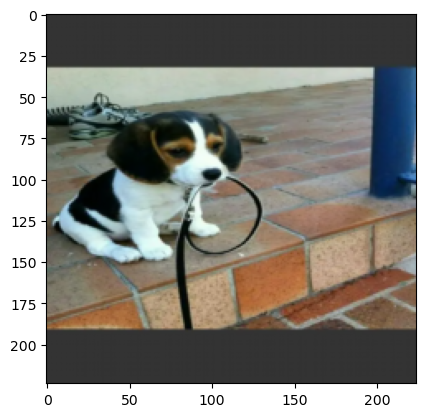

In [8]:
pred_model = torch.load('epoch-100', map_location=torch.device('cpu')).eval()

img = read_image('test4.png', mode=ImageReadMode.RGB) / 255
img = resize(img, [224, 224], antialias=True)
pred = pred_model(img.float().unsqueeze(0))
idx = torch.max(pred, 1).indices[0].item()
print(idx_to_cls[idx])
plt.imshow(img.numpy().transpose(1, 2, 0))

In [10]:
torch.save({
    'model': pred_model,
    'idx_to_cls': idx_to_cls
}, 'production_model')

In [11]:
opt_mod = torch.compile(pred_model)

In [13]:
opt_mod(img.float().unsqueeze(0))

tensor([[-15.2503,  -9.8790, -14.2898, -20.7591, -12.4421,  -9.6571, -13.8664,
         -12.6670, -15.7183, -20.3607,  -5.3959,  -0.5035, -14.8517, -10.7191,
         -17.1491,  -7.9492,  -8.7543, -13.5262, -18.3396, -15.0907, -10.8596,
         -12.5786, -16.9676, -11.4804, -20.3692, -15.0659, -23.7764, -20.0790,
         -15.4018, -15.9721, -17.5535, -20.6004, -21.4556, -19.6906, -15.9344,
         -16.5258, -14.4620, -17.3582, -19.5127, -17.2069, -17.1119, -13.6707,
         -13.9929, -16.9362, -19.4187, -13.9169, -19.5851, -17.9066, -18.4805,
         -15.5237, -11.5388, -18.1474, -14.6299, -19.8983, -18.1715, -19.2369,
         -19.3850, -17.6144, -17.5844, -17.9036, -23.6513, -14.1474, -14.6871,
         -19.9392, -15.9851, -15.4876, -10.8364, -13.1064, -18.6051, -18.6282,
         -18.0102, -13.6213, -19.1361, -19.0082, -21.9684, -15.5290, -15.6256,
         -19.3368, -19.0016, -14.5984, -11.1009, -14.6954, -21.9369, -15.6855,
         -14.3929, -16.0585, -21.5089,  -7.5252, -15

In [16]:
example_input = torch.rand(1, 3, 224, 224)
traced_script_module = torch.jit.trace(pred_model, example_input)
traced_script_module.save("serving_model.pt")


In [20]:
from json import dump

with open('index_to_name.json', mode='w+', encoding='utf-8') as f:
    dump(idx_to_cls, f)